#### Predict BTC high prices using the past 60-day high prices. Predict BTC low prices using the past 60-day low prices. Splitted data to train datasets (first 320 days) and test datasets (last 105 days).

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import seed
from sklearn.preprocessing import MinMaxScaler

# Import Data

In [3]:
data = pd.read_csv("CrypotQuant_BTC_20190101-20200229.csv")

In [4]:
df = pd.read_csv("CrypotQuant_BTC_20190101-20200229.csv")
df = df.iloc[::-1]
df['date'] = pd.to_datetime(df['date'])
df.head
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']

# Price high

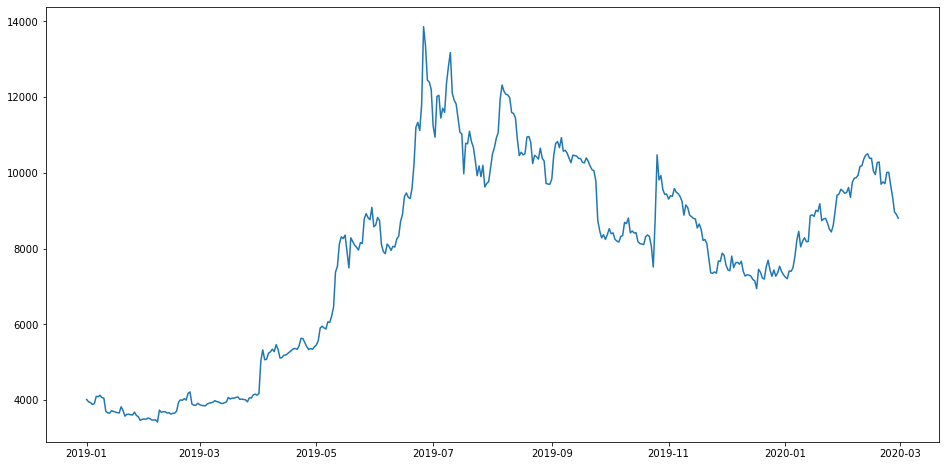

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df['price_usd_high'], label='Close Price history')

## Clean data 

In [6]:
data = df.sort_index(ascending=True, axis=0)
new_data_high = pd.DataFrame(index=range(0,len(df)),columns=['date', 'price_usd_high'])
for i in range(0,len(data)):
    new_data_high['date'][i] = data['date'][i]
    new_data_high['price_usd_high'][i] = data['price_usd_high'][i]
new_data_high.index = new_data_high.date
new_data_high.drop('date', axis=1, inplace=True)

In [7]:
dataset_high = new_data_high.values
train_high = dataset_high[0:320,:]
valid_high = dataset_high[320:,:]

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_high = scaler.fit_transform(dataset_high)

In [9]:
x_train_high, y_train_high = [], []
for i in range(60,len(train_high)):
    x_train_high.append(scaled_data_high[i-60:i,0])
    y_train_high.append(scaled_data_high[i,0])
x_train_high, y_train_high = np.array(x_train_high), np.array(y_train_high)

In [10]:
x_train_high = np.reshape(x_train_high, (x_train_high.shape[0],x_train_high.shape[1],1))

## Train model on train dataset

In [14]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_high.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train_high, y_train_high, epochs=1, batch_size=1, verbose=2)


260/260 - 4s - loss: 0.0146


## Predict on test dataset

In [15]:
inputs_high = new_data_high[len(new_data_high) - len(valid_high) - 60:].values
inputs_high = inputs_high.reshape(-1,1)
inputs_high  = scaler.transform(inputs_high)

In [16]:
X_test_high = []
for i in range(60,inputs_high.shape[0]):
    X_test_high.append(inputs_high[i-60:i,0])
X_test_high = np.array(X_test_high)

X_test_high = np.reshape(X_test_high, (X_test_high.shape[0],X_test_high.shape[1],1))
value_price_usd_high = model.predict(X_test_high)
value_price_usd_high = scaler.inverse_transform(value_price_usd_high)

In [17]:
rms=np.sqrt(np.mean(np.power((valid_high-value_price_usd_high),2)))
rms

696.1718166455395

## Compare actual price_high with predited price_high 

<ipython-input-18-8f3f03c392bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_high['pred'] =value_price_usd_high


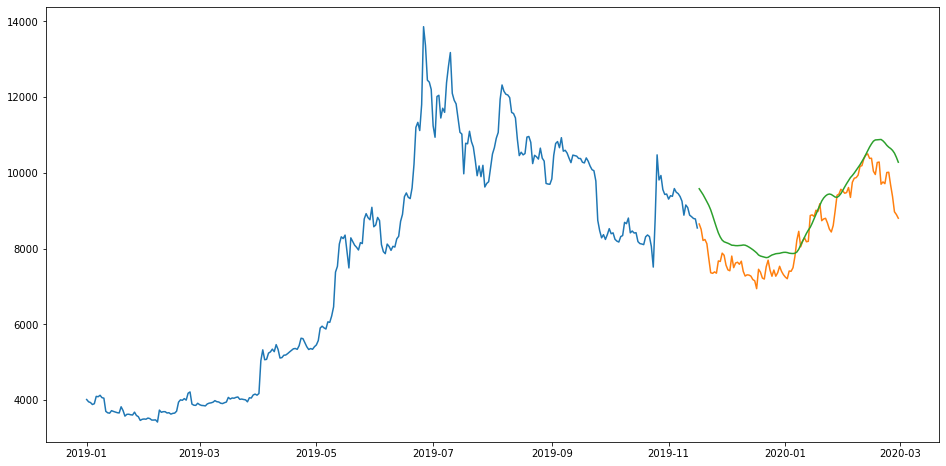

In [18]:
train_high = df[:320]
#print(train)
valid_high = df[320:]
valid_high['pred'] =value_price_usd_high
plt.figure(figsize=(16,8))
#valid['Predictions'] = closing_price
plt.plot(train_high['price_usd_high'])
plt.plot(valid_high['price_usd_high'])
plt.plot(valid_high['pred'])

# Price low 

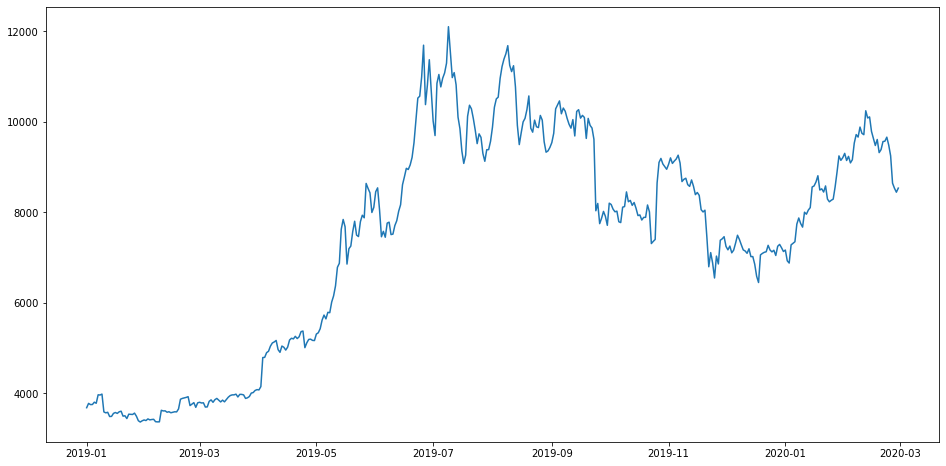

In [19]:
plt.figure(figsize=(16,8))
plt.plot(df['price_usd_low'], label='Close Price history')

## Clean data

In [20]:
data = df.sort_index(ascending=True, axis=0)
new_data_low = pd.DataFrame(index=range(0,len(df)),columns=['date', 'price_usd_low'])
for i in range(0,len(data)):
    new_data_low['date'][i] = data['date'][i]
    new_data_low['price_usd_low'][i] = data['price_usd_low'][i]
new_data_low.index = new_data_low.date
new_data_low.drop('date', axis=1, inplace=True)

dataset_low = new_data_low.values
train_low = dataset_low[0:320,:]
valid_low = dataset_low[320:,:]


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_low = scaler.fit_transform(dataset_low)

x_train_low, y_train_low = [], []
for i in range(60,len(train_low)):
    x_train_low.append(scaled_data_low[i-60:i,0])
    y_train_low.append(scaled_data_low[i,0])
x_train_low, y_train_low = np.array(x_train_low), np.array(y_train_low)

x_train_low = np.reshape(x_train_low, (x_train_low.shape[0],x_train_low.shape[1],1))



## Train model 

In [21]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_low.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train_low, y_train_low, epochs=1, batch_size=1, verbose=2)



260/260 - 5s - loss: 0.0145


## Predict  

In [22]:
inputs_low = new_data_low[len(new_data_low) - len(valid_low) - 60:].values
inputs_low = inputs_low.reshape(-1,1)
inputs_low  = scaler.transform(inputs_low)


X_test_low = []
for i in range(60,inputs_low.shape[0]):
    X_test_low.append(inputs_low[i-60:i,0])
X_test_low = np.array(X_test_low)

X_test_low = np.reshape(X_test_low, (X_test_low.shape[0],X_test_low.shape[1],1))
value_price_usd_low = model.predict(X_test_low)
value_price_usd_low = scaler.inverse_transform(value_price_usd_low)

rms=np.sqrt(np.mean(np.power((valid_low-value_price_usd_low),2)))
rms

570.4891124849125

# Compare actual price_low with predited price_low

<ipython-input-23-7210d7ed72bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_low['pred'] =value_price_usd_low


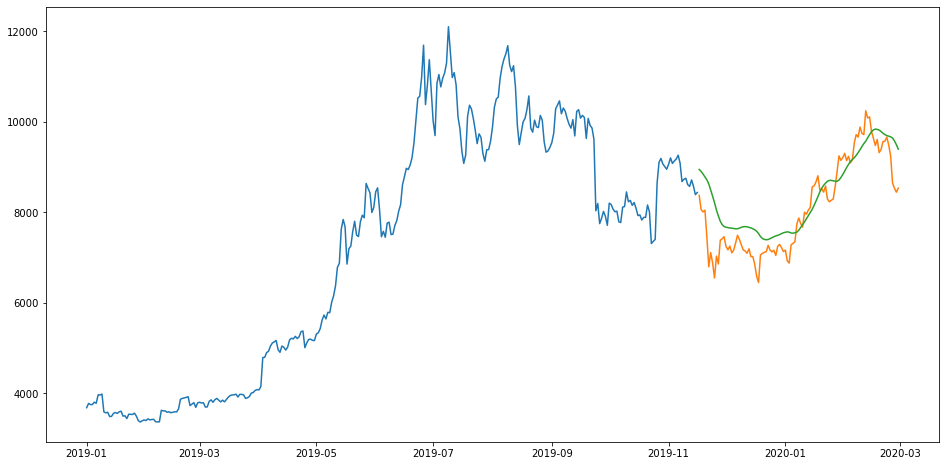

In [23]:
train_low = df[:320]
#print(train)
valid_low = df[320:]
valid_low['pred'] =value_price_usd_low
plt.figure(figsize=(16,8))
#valid['Predictions'] = closing_price
plt.plot(train_low['price_usd_low'])
plt.plot(valid_low['price_usd_low'])
plt.plot(valid_low['pred'])
